In [1]:
# Importing the necessary libraries

# For filtering warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# Reading the data from .csv file

df = pd.read_csv('Leads.csv')

In [3]:
# Displaying the table

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Number of rows and columns

df.shape

(9240, 37)

In [5]:
# Datatypes in the table

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Describing the table

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# There are 9240 rows and 37 columns of data with quite a lot of null values as observed in info.

In [8]:
# Duplicate checking

df_dup = df.copy()
df_dup.drop_duplicates(subset='Prospect ID', inplace=True)
df_dup.shape

(9240, 37)

In [9]:
# Since the shape of both the dataframes are same, there are no duplicates

In [10]:
# From inspecting  we found that many data entered is found as "Select" which actually is not the actual data itself.
# Replacing 'Select' with NaN (Since it means no option is selected).

df = df.replace('Select', np.nan)

In [11]:
# Null value checking - Rows (Percentage)

round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

5840    0.16
2942    0.15
3928    0.15
4768    0.14
3897    0.14
        ... 
7888    0.00
2235    0.00
1050    0.00
2223    0.00
5426    0.00
Length: 9240, dtype: float64

In [12]:
# Finding the null percentages across columns

round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [13]:
# dropping columns with more than 45% of nullvalues:

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [14]:
# Null value checking after dropping above 45% - Columns (Percentage)

round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [15]:
# The maximumn % of null values in the current dataframe is just close to 40%.

In [16]:
#Column country has 26% of null values 
#Lets look at the country column by plotting

df['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [17]:
# Since India is the most common occurence, we can group rest of the countires as out of India and Null to be set as not given

df['Country'] = df['Country'].replace(np.nan,'Not Specified')
def country(x):
    category = ""
    if x == "India":
        country_group = "India"
    elif x == "Not Specified":
        country_group = "Not Specified"
    else:
        country_group = "outside india"
    return country_group

df['Country'] = df.apply(lambda x:country(x['Country']), axis = 1)
df['Country'].value_counts()

India            6492
Not Specified    2461
outside india     287
Name: Country, dtype: int64

In [18]:
# Analysing City column - 40% null value

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
# Mumbai is the prominent City with major share of 3222 occurrences among total of 9240 and is NaN with 3669
# We shall impute NaN with Not Specified as the number is huge and others as outside mumbai
# and we also saw countries outside India so we could have Cities from those countries
df['City'] = df['City'].replace(np.nan,'Not Specified')
def country(x):
    category = ""
    if x == "Mumbai":
        country_group = "Mumbai"
    elif x == "Not Specified":
        country_group = "Not Specified"
    else:
        country_group = "outside Mumbai"
    return country_group

df['City'] = df.apply(lambda x:country(x['City']), axis = 1)
df['City'].value_counts()

Not Specified     3669
Mumbai            3222
outside Mumbai    2349
Name: City, dtype: int64

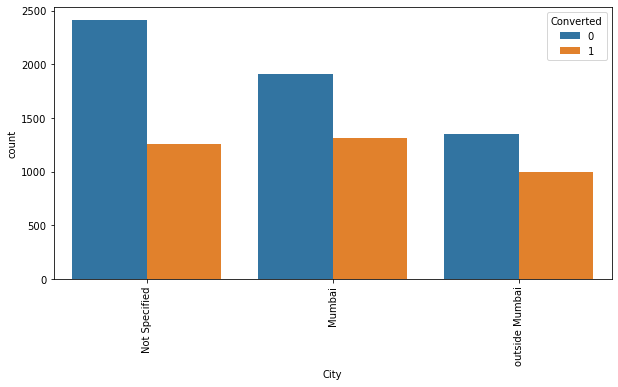

In [20]:
#plotting City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

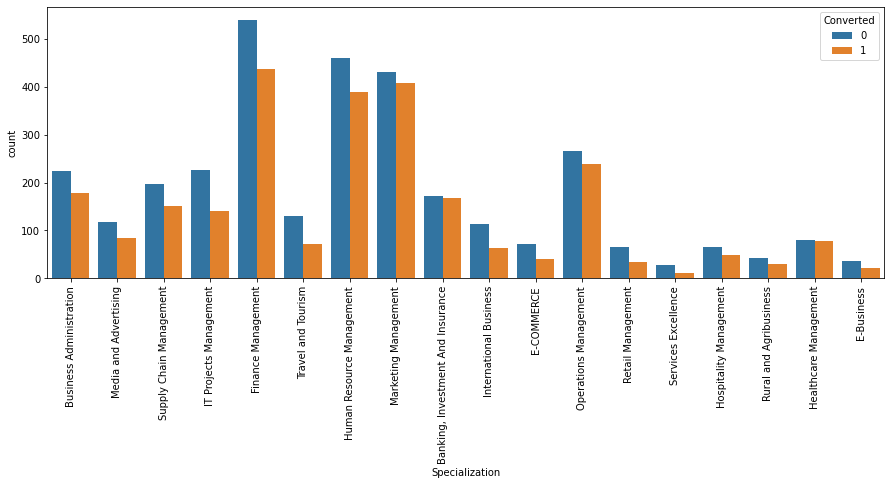

In [21]:
# Analysing column : "Specialization" - with 37% of missing values

plt.figure(figsize=(15,5))
sns.countplot(df['Specialization'], hue=df.Converted)
plt.xticks(rotation=90)

In [22]:
# If the lead is a "Student", or with any other 'specialisation", then this will be left blank. 
# Hence a category "Others" shalll be creted.

# Creating a separate category called 'Others' for this:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

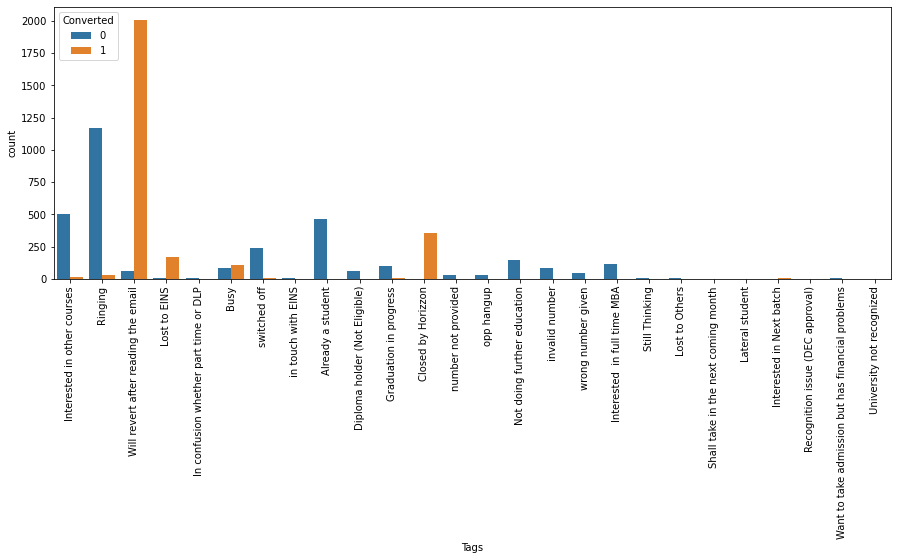

In [23]:
# Tags column - 36% missing values

plt.figure(figsize=(15,5))
sns.countplot(df['Tags'], hue=df.Converted)
plt.xticks(rotation=90)

In [24]:
# Imputing the missing data in the "tags" 
# Column with 'Will revert after reading the email'
df['Tags']=df['Tags'].replace(np.nan,'Will revert after reading the email')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

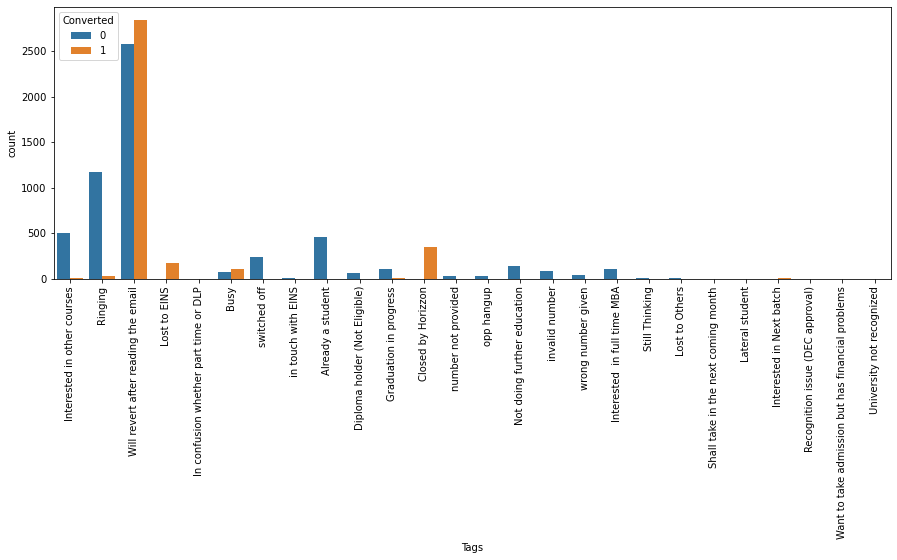

In [25]:
# Visualising after imputing "tags" Column with 'Will revert after reading the email'
plt.figure(figsize=(15,5))
sns.countplot(df['Tags'], hue=df.Converted)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

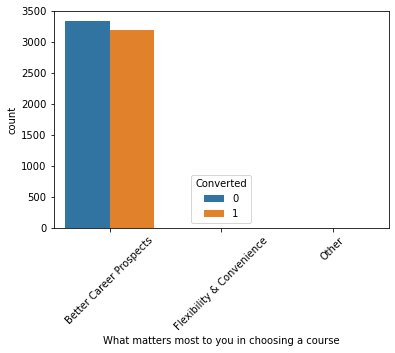

In [26]:
# Column: 'What matters most to you in choosing a course' - 29% missing values.

sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
plt.xticks(rotation=45)

In [27]:
# This implies our users are mostly looking for career transition who look for this course, 
# and  is dominant on one category so no major insights

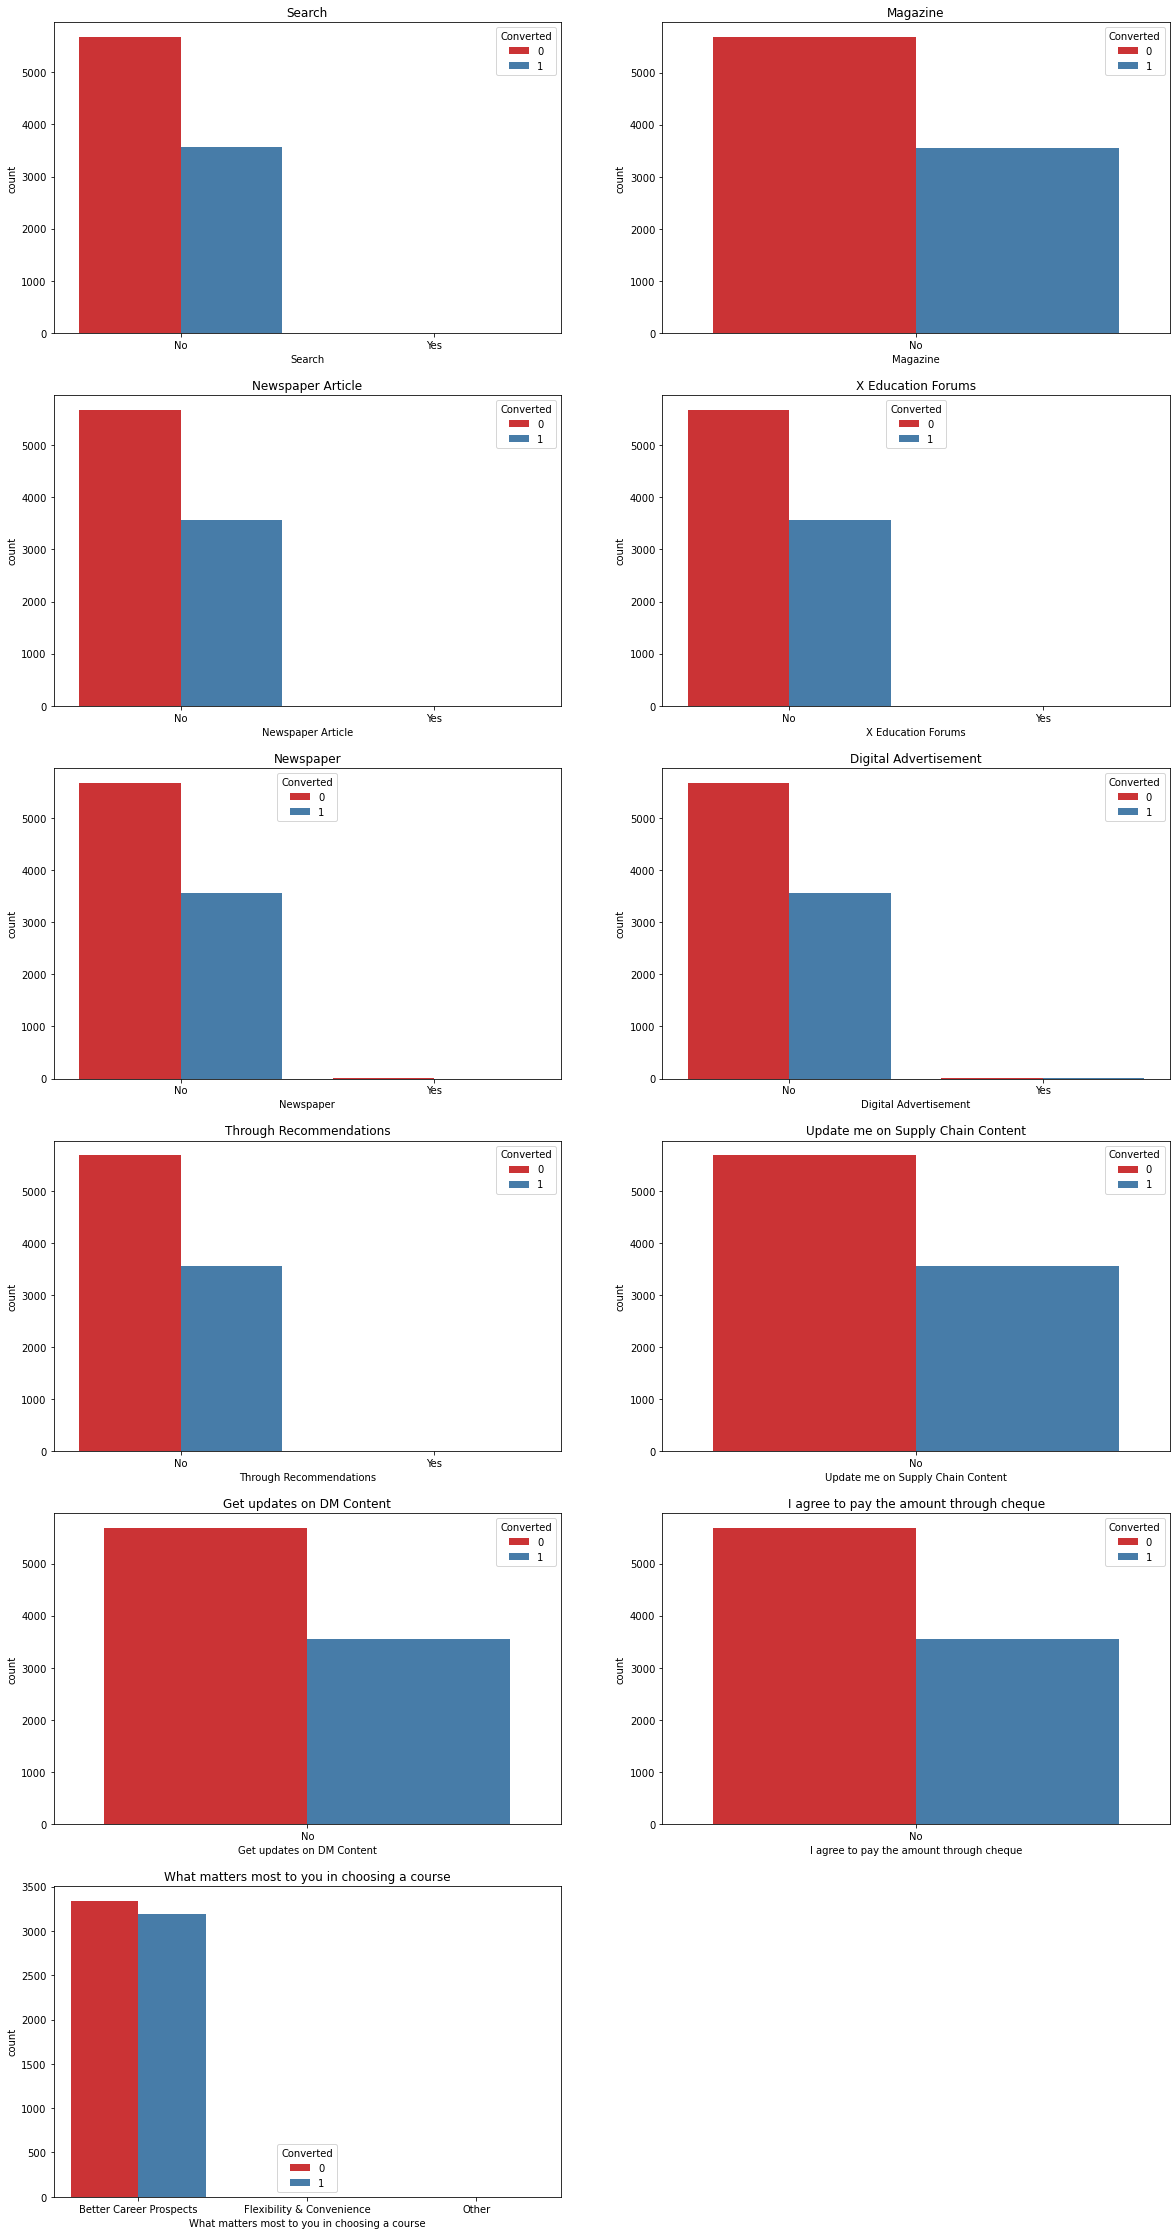

In [28]:
Single_Dominant_drop_cols = [
       'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque', 'What matters most to you in choosing a course']
plt.figure(figsize = (20,40))
for i in range(len(Single_Dominant_drop_cols)):
    plt.subplot(6,2,i+1)
    sns.countplot(df[Single_Dominant_drop_cols[i]], hue = "Converted", 
                  data = df,palette='Set1')
    plt.title(Single_Dominant_drop_cols[i])




In [29]:
#The above columns doesnt give much insights hence we drop it.

df=df.drop(Single_Dominant_drop_cols,axis=1)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

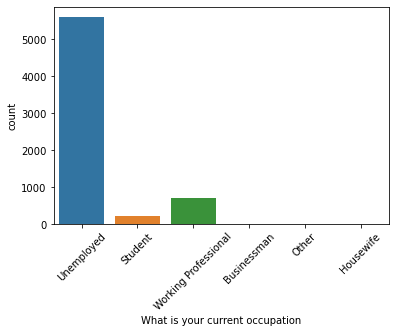

In [30]:
#Column: 'What is your current occupation' - 29% missing values

sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=45)

In [31]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
df['What is your current occupation']=df['What is your current occupation'].replace(np.nan,'Unemployed')

In [32]:
# Finding the null percentages across columns after replacing significant NaN values

round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               1.0
Total Time Spent on Website               0.0
Page Views Per Visit                      1.0
Last Activity                             1.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Receive More Updates About Our Courses    0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [33]:
# Dropping the rows with null values, 
# as the rows with such null value are very few in data set

df.dropna(inplace = True)

In [34]:
# Finding the null percentages across columns after replacing all NaN values, and dropping few column

round(df.isnull().sum()/len(df.index),2)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Receive More Updates About Our Courses    0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [35]:
# Percentage of rows retainemsn ad

(len(df.index)/9240)*100

98.2034632034632

In [36]:
# Now all the Null values are removed and 98% of rows are retained, which is good to go.

In [37]:
# Univariate and Bivariate analysis

# Column - "Converted"

# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

# Calculating the current percentage conversion of Leads
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

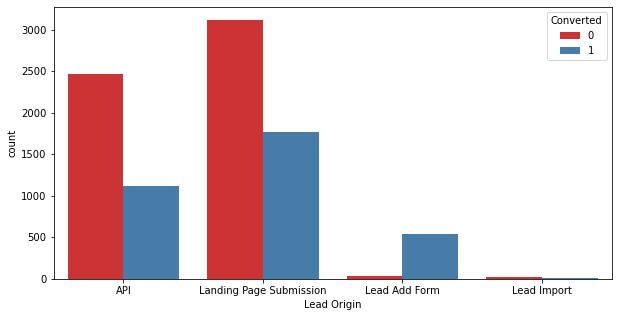

In [38]:
# Column - "Lead Origin"

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 0)
plt.show()

In [39]:
# To improve overall lead conversion rate, focus more on improving lead converion of API and Landing Page Submission origin.

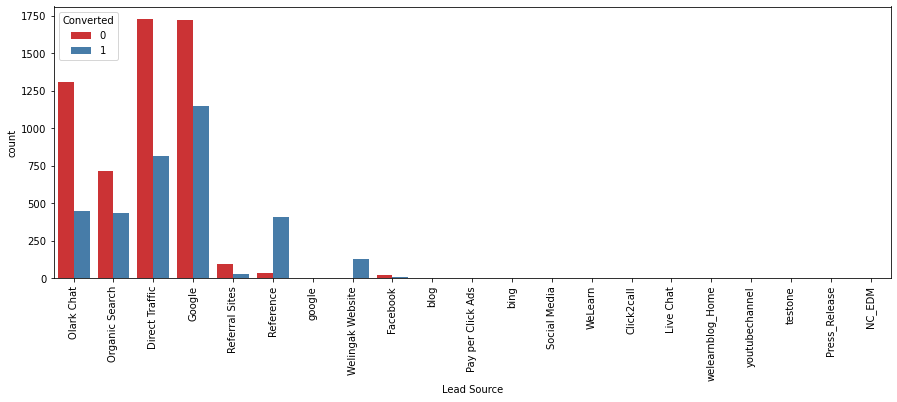

In [40]:
# Column - "Lead Source"

plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

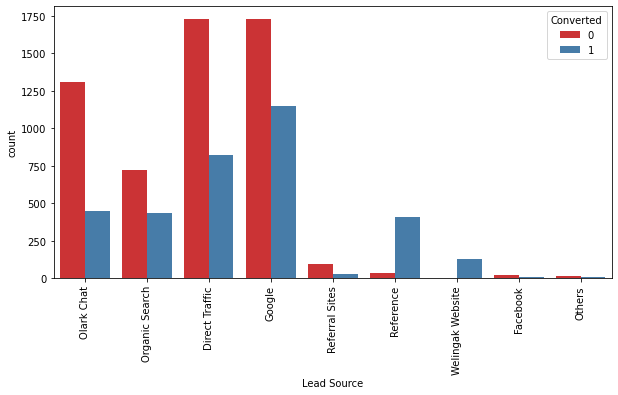

In [41]:
# 'google' is to be replaced with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

# Creating a new category 'Others' for some other Lead sources with insignificant values.
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

# Visualizing "Lead Source" again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

In [42]:
# Conversion rate of "Reference" is the maximum. It's of highest potential.
# "Google" and "Direct Traffic" has maximum contribution, but has got huge non-conversion too, hence got more potential.
# Olark Chat has got least conversion rate.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

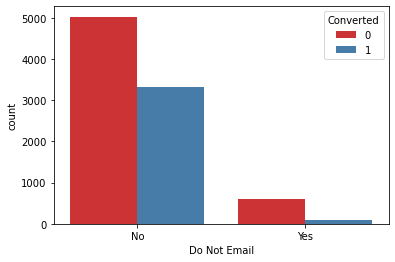

In [43]:
# Column - "Do not Email"

sns.countplot(x = "Do Not Email", hue = "Converted", data = df, palette='Set1')
plt.xticks(rotation = 0)

In [44]:
# Most opt for "No". No specific inference related to conversion.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

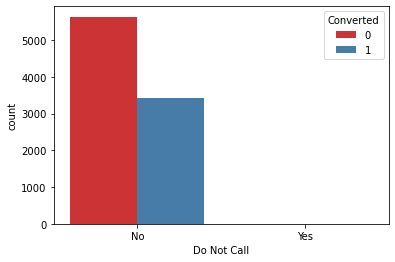

In [45]:
# Column - 'Do not call'

sns.countplot(x = "Do Not Call", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 0)

In [46]:
# Almost all prefer not to call. No specific inference related to conversion.

In [47]:
# Column - ' Total Time Spent on Website'

df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

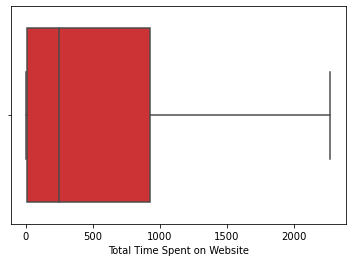

In [48]:
sns.boxplot(df['Total Time Spent on Website'],palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

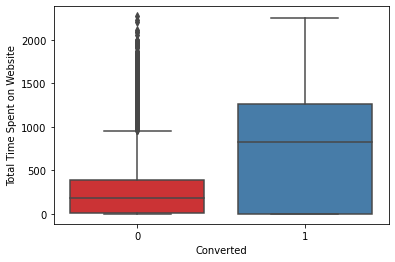

In [49]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df,palette='Set1')

In [50]:
# Column - 'TotalVisits'

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

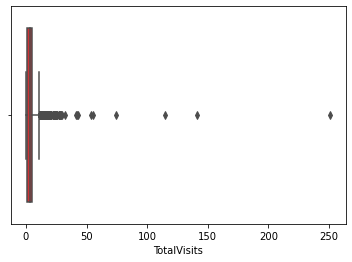

In [51]:
sns.boxplot(df['TotalVisits'],palette='Set1')

<AxesSubplot:xlabel='TotalVisits'>

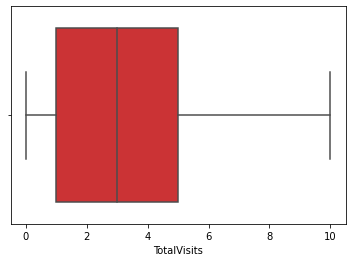

In [52]:
# Since outliers are there, we shall cap it at 95%

percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

# Visualizing again
sns.boxplot(df['TotalVisits'],palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

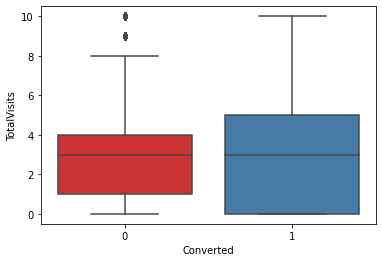

In [53]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df,palette='Set1')

In [54]:
# Time spent on Websites is a clear indication for conversion. but not specifically the number of vi

In [55]:
# Column - "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

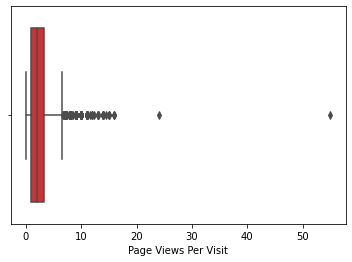

In [56]:
sns.boxplot(df['Page Views Per Visit'],palette='Set1')

<AxesSubplot:xlabel='Page Views Per Visit'>

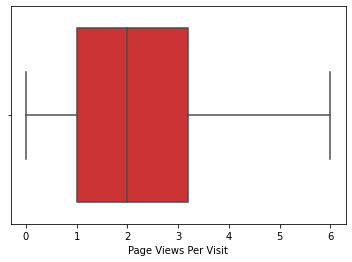

In [57]:
# Since outliers are there, we shall cap it at 95%

percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

# Visualizing again
sns.boxplot(df['Page Views Per Visit'],palette='Set1',orient='vert')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

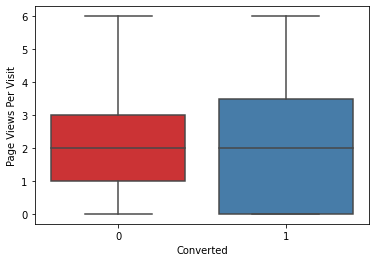

In [58]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =df,palette='Set1')

In [59]:
# Median for both are same. No specific inference related to conversion.

In [60]:
# Column - "Last Activity"

df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

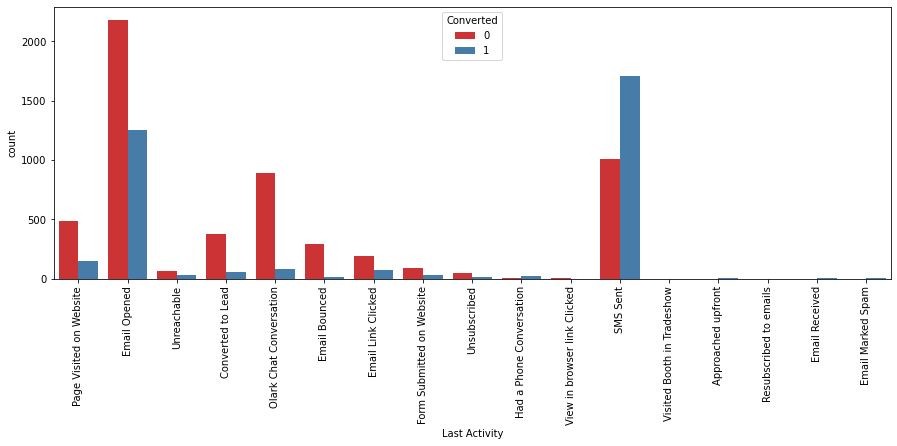

In [61]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

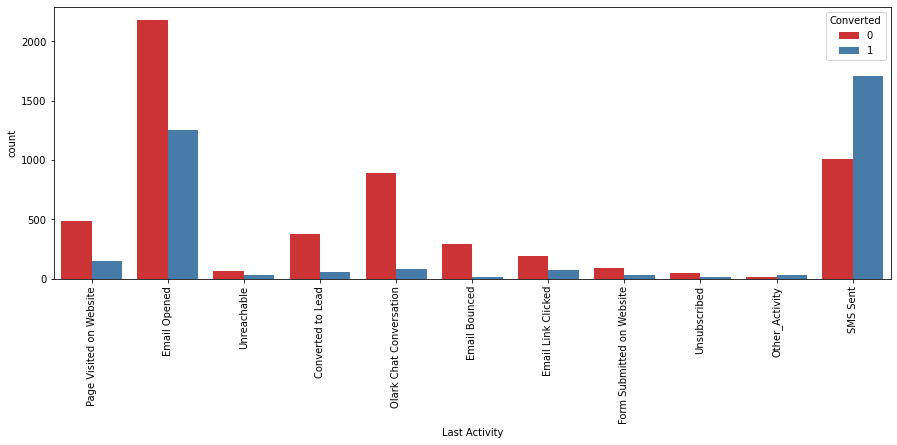

In [62]:
# Combining less significant activities to "Other_Activity" which are having less data.
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

# Visualizing afterwards
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

In [63]:
# Last activities such as "Email Opened" and "SMS sent" has got major significance.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

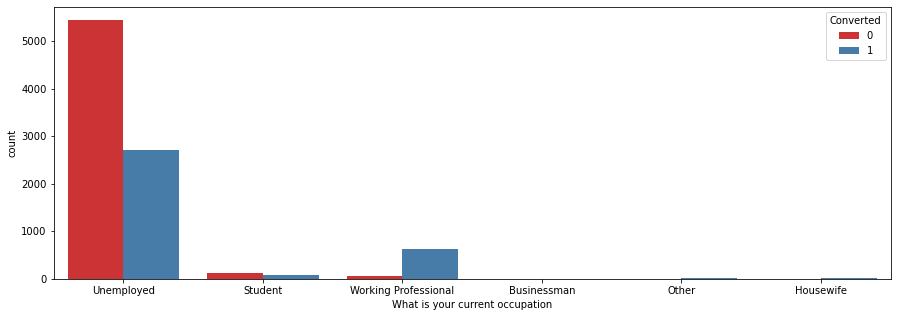

In [64]:
# Columns - "What is your current occupation"

plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 0)

In [65]:
# Unemployed and Working professionals have good conversions, in which most of working professionals get converted as well.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

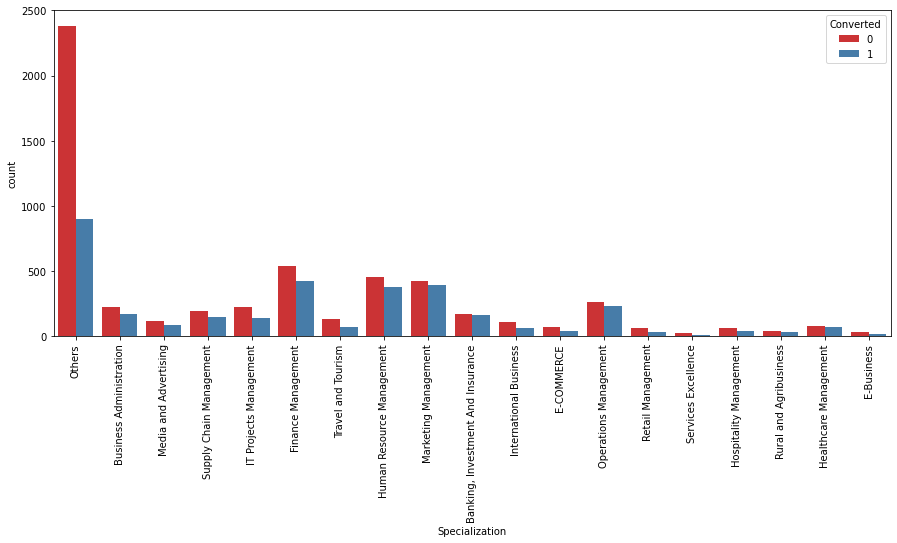

In [66]:
# Column : "Specialization"

plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

In [67]:
 # Finance Mangement, HR and marketing have good conversions, in which most of working professionals get converted as well.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Do Not Call                             9074 non-null   object 
 6   Converted                               9074 non-null   int64  
 7   TotalVisits                             9074 non-null   float64
 8   Total Time Spent on Website             9074 non-null   int64  
 9   Page Views Per Visit                    9074 non-null   float64
 10  Last Activity                           9074 non-null   obje

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

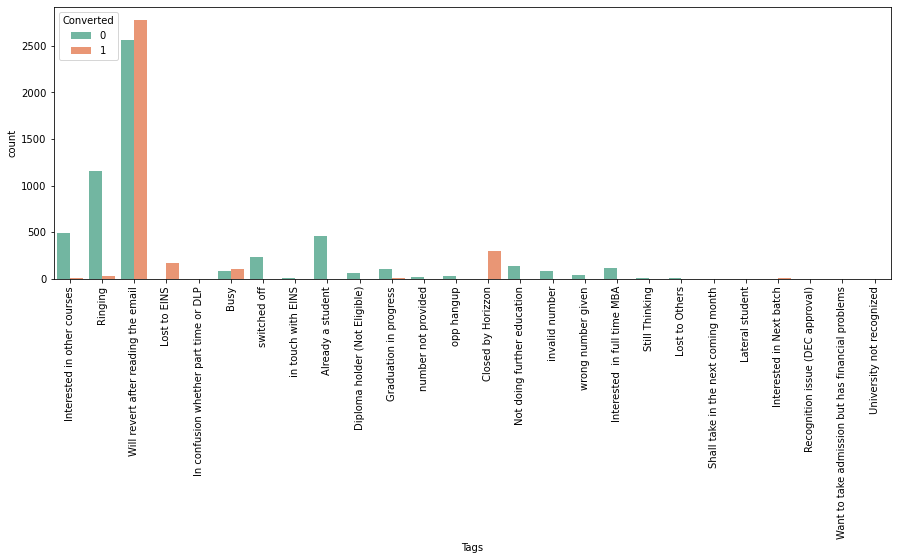

In [69]:
# Column - "Tags"

plt.figure(figsize=(15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df,palette='Set2')
plt.xticks(rotation = 90)

In [70]:
# Hence "Tags" is a created column by Sales - It shall be removed from modelling.

<AxesSubplot:xlabel='City', ylabel='count'>

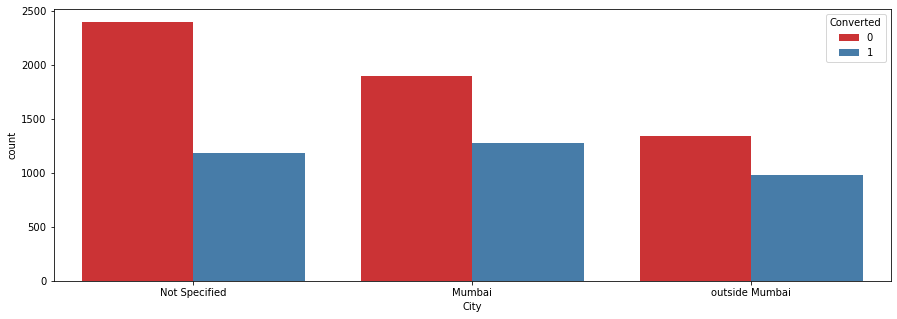

In [71]:
# Column - "City"

plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = df,palette='Set1')

In [72]:
# Mumbai contributes maximum with more than 50% conversion rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

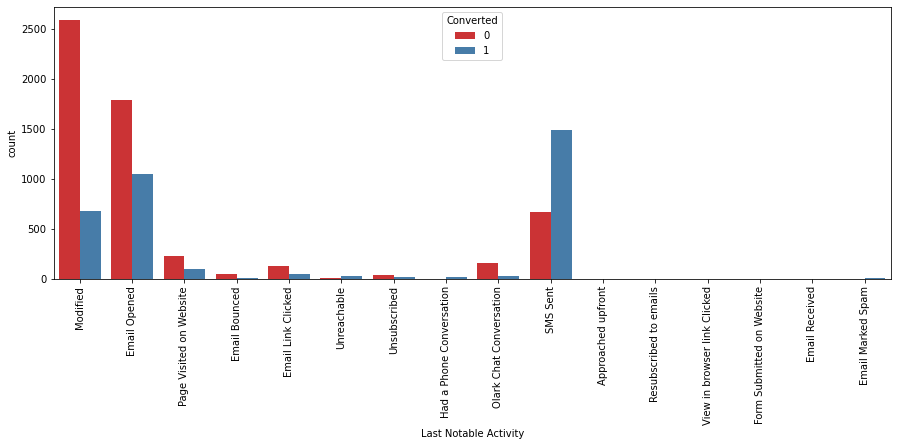

In [73]:
# Column - "Last Notable Activity"

plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

In [74]:
# "Email Opened" and "SMS Sent" are significant contributors, in which "SMS Sent" has maximum conversion rate.

(array([0, 1, 2]),
 [Text(0, 0, 'Not Specified'),
  Text(1, 0, 'India'),
  Text(2, 0, 'outside india')])

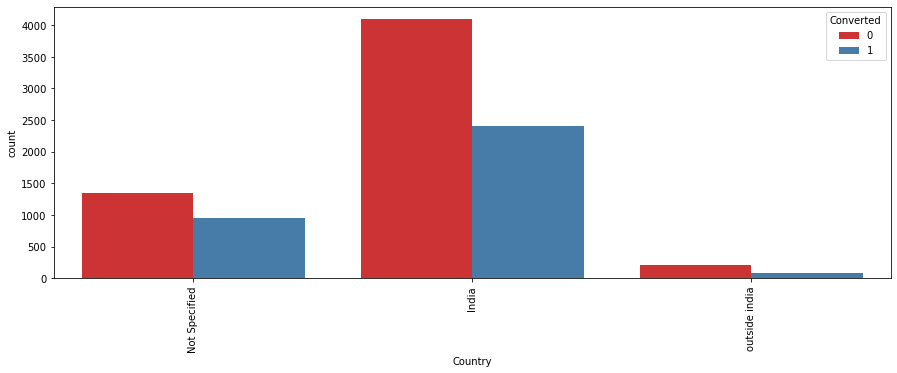

In [75]:
# Column - "Country"

plt.figure(figsize=(15,5))
sns.countplot(x = "Country", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

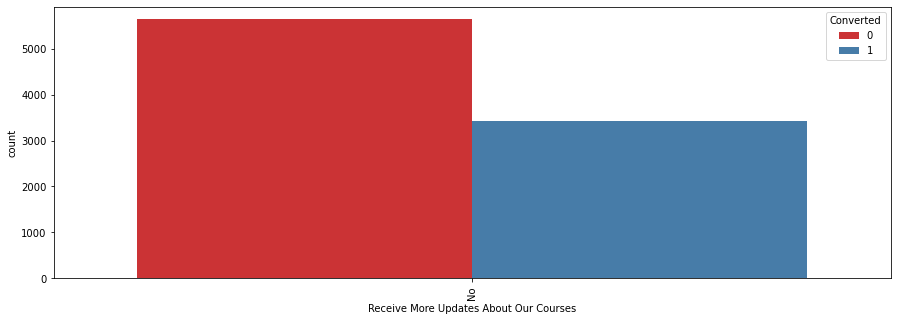

In [76]:
# Column - "Country"

plt.figure(figsize=(15,5))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df,palette='Set1')
plt.xticks(rotation = 90)

In [77]:
# Based on above Univariate analysis we can infer that many columns are not significant at all as they are not providing any meaningful results.
# Hence, we shall remove those columns.
x=['Lead Number','Tags','Receive More Updates About Our Courses', 'A free copy of Mastering The Interview']
df = df.drop(x,1)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Country                          9074 non-null   object 
 11  Specialization                   9074 non-null   object 
 12  What is your current

In [79]:
df.shape

(9074, 15)

In [80]:
# The dataframe is now of shape (9074, 15) from initial (9240, 37)

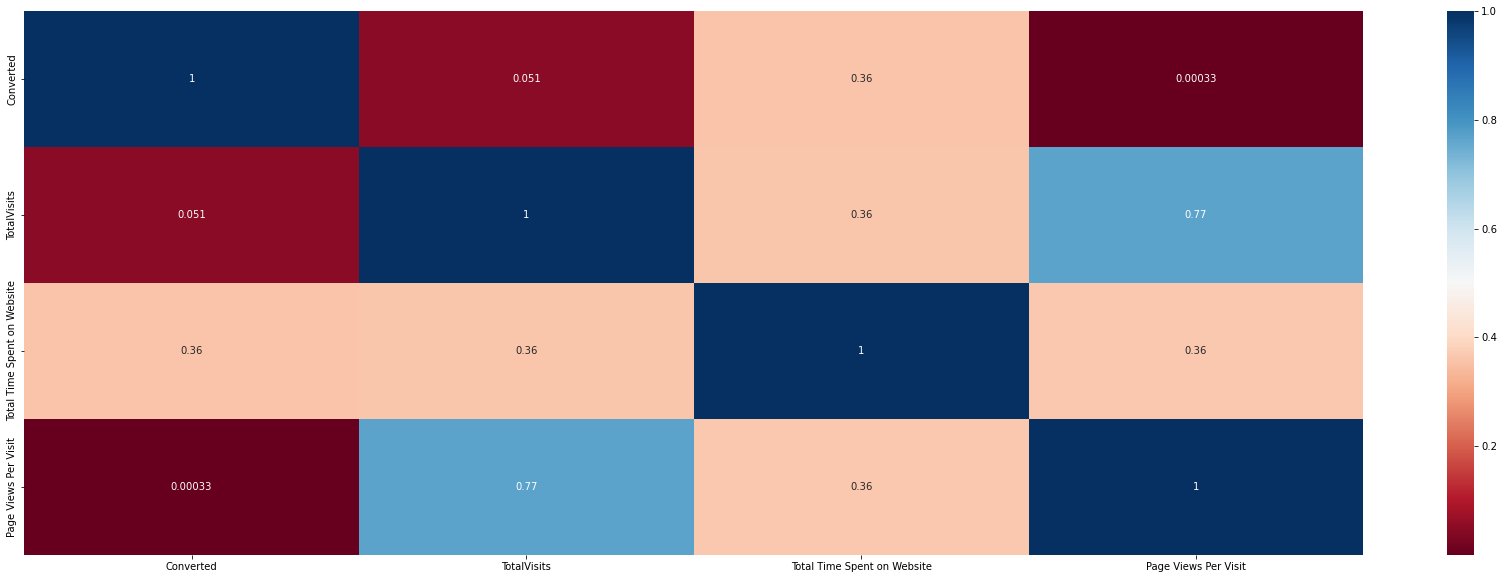

In [81]:
# Checking correlations
plt.figure(figsize=(30,10))

# heatmap
sns.heatmap(df.corr(), cmap="RdBu", annot=True)
plt.show()


In [82]:
# Data Preparation

# Converting YES/No to 1/0

vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[vars] = df[vars].apply(binary_map)

In [83]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [84]:
# Creating Dummy variables for categorical features

# Categorical features are "Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
#'What is your current occupation','City','Last Notable Activity', 'Country'

# Creating a dummy variable for the categorical variables.
dm = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity', 'Country']], drop_first=True)
dm.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Not Specified,Country_outside india
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [85]:
# Adding dummy dataframe, dm to the main dataframe, df
df = pd.concat([df, dm], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Not Specified,Country_outside india
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,1,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,1,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,1,0,0,0,0,0,0,0,0,0


In [86]:
# Dropping columns for which dummies are created:

df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity', 'Country'], axis = 1)

df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Not Specified,Country_outside india
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [87]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Not Specified,Country_outside india
0,0,0,0.0,0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [88]:
# Putting target variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
# Splitting to train and test in 70:30 ratio.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Country_Not Specified,Country_outside india
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [91]:
# Lead Conversion rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

In [92]:
# Feature selection using RFE

logreg = LogisticRegression()

# Running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)
rfe.support_
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', False, 29),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 47),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1

In [93]:
# Viewing columns selected by RFE

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Not Specified', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Country_Not Specified'],
      dtype='object')

In [94]:
# Model Building

# Model 1
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.8
Date:                Mon, 17 Oct 2022   Deviance:                       5155.5
Time:                        23:16:06   Pearson chi2:                 6.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2036      0.637      1.891      0.059      -0.044       2.451
Do Not Email                                            -1.6924      0.192     -8.827      0.000      -2.068      -1.317
Total Time Spent on Website                              1.1233      0.041     27.359      0.000       1.043       1.204
Lead Origin_Landing Page Submission                     -1.4489      0.138    -10.483      0.000      -1.720      -1.178
Lead Origin_Lead Add Form                                2.0636      0.237      8.709      0.000       1.599       2.528
Lead Source_Facebook                                    -0.8032      0.480     -1.672      0.094      -1.745       0.138
Lead Source_Welingak Website                             2.6747      0.757      3.534      0.000       1.191       4.158
Last Activity_Olark Chat Conversation                   -0.9333      0.171     -5.448      0.000      -1.269      -0.598
Last Activity_Other_Activity                             1.9278      0.536      3.593      0.000       0.876       2.979
Last Activity_SMS Sent                                   1.3620      0.076     17.879      0.000       1.213       1.511
Last Activity_Unsubscribed                               1.4824      0.484      3.064      0.002       0.534       2.431
Specialization_Others                                   -0.8505      0.167     -5.102      0.000      -1.177      -0.524
What is your current occupation_Housewife               21.7192   1.51e+04      0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Student                 -0.6007      0.669     -0.898      0.369      -1.912       0.710
What is your current occupation_Unemployed              -1.0617      0.629     -1.688      0.091      -2.295       0.171
What is your current occupation_Working Professional     1.5604      0.655      2.383      0.017       0.277       2.844
City_Not Specified                                      -0.6984      0.177     -3.949      0.000      -1.045      -0.352
Last Notable Activity_Had a Phone Conversation           1.3455      1.227      1.097      0.273      -1.059       3.750
Last Notable Activity_Modified                          -0.8701      0.082    -10.628      0.000      -1.031      -0.710
Last Notable Activity_Unreachable                        1.6062      0.484      3.320      0.001       0.658       2.554
Country_Not Specified                                    1.2424      0.125      9.960      0.000       0.998       1.487
========================================================================================================================
"""

In [95]:
# Pvalue of 'What is your current occupation_Housewife' is very high, this column shall be dropped.

# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

In [96]:
# Model 2

X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.7
Date:                Mon, 17 Oct 2022   Deviance:                       5159.5
Time:                        23:16:06   Pearson chi2:                 6.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6891      0.588      2.873      0.004       0.537       2.842
Do Not Email                                            -1.6966      0.192     -8.842      0.000      -2.073      -1.321
Total Time Spent on Website                              1.1218      0.041     27.347      0.000       1.041       1.202
Lead Origin_Landing Page Submission                     -1.4450      0.138    -10.462      0.000      -1.716      -1.174
Lead Origin_Lead Add Form                                2.0712      0.237      8.748      0.000       1.607       2.535
Lead Source_Facebook                                    -0.8049      0.480     -1.676      0.094      -1.746       0.136
Lead Source_Welingak Website                             2.6690      0.757      3.526      0.000       1.186       4.152
Last Activity_Olark Chat Conversation                   -0.9337      0.171     -5.446      0.000      -1.270      -0.598
Last Activity_Other_Activity                             1.9300      0.536      3.598      0.000       0.879       2.981
Last Activity_SMS Sent                                   1.3612      0.076     17.871      0.000       1.212       1.511
Last Activity_Unsubscribed                               1.4859      0.484      3.072      0.002       0.538       2.434
Specialization_Others                                   -0.8431      0.167     -5.062      0.000      -1.169      -0.517
What is your current occupation_Student                 -1.0876      0.622     -1.748      0.080      -2.307       0.132
What is your current occupation_Unemployed              -1.5481      0.579     -2.673      0.008      -2.683      -0.413
What is your current occupation_Working Professional     1.0738      0.607      1.769      0.077      -0.116       2.264
City_Not Specified                                      -0.7047      0.177     -3.985      0.000      -1.051      -0.358
Last Notable Activity_Had a Phone Conversation           1.3404      1.227      1.093      0.274      -1.064       3.744
Last Notable Activity_Modified                          -0.8730      0.082    -10.665      0.000      -1.033      -0.713
Last Notable Activity_Unreachable                        1.6021      0.484      3.308      0.001       0.653       2.551
Country_Not Specified                                    1.2413      0.125      9.954      0.000       0.997       1.486
========================================================================================================================
"""

In [97]:
# Pvalue of ''What is your current occupation_Student'' is very high, this column shall be dropped.
col1 = col1.drop('What is your current occupation_Student')
# 

In [98]:
# Model 3

X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.4
Date:                Mon, 17 Oct 2022   Deviance:                       5162.7
Time:                        23:16:06   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7710      0.246      3.137      0.002       0.289       1.253
Do Not Email                                            -1.6930      0.192     -8.836      0.000      -2.069      -1.317
Total Time Spent on Website                              1.1225      0.041     27.378      0.000       1.042       1.203
Lead Origin_Landing Page Submission                     -1.4565      0.138    -10.558      0.000      -1.727      -1.186
Lead Origin_Lead Add Form                                2.0814      0.237      8.797      0.000       1.618       2.545
Lead Source_Facebook                                    -0.8069      0.480     -1.681      0.093      -1.748       0.134
Lead Source_Welingak Website                             2.6629      0.757      3.518      0.000       1.180       4.146
Last Activity_Olark Chat Conversation                   -0.9361      0.171     -5.465      0.000      -1.272      -0.600
Last Activity_Other_Activity                             1.9270      0.537      3.591      0.000       0.875       2.979
Last Activity_SMS Sent                                   1.3596      0.076     17.846      0.000       1.210       1.509
Last Activity_Unsubscribed                               1.4817      0.484      3.063      0.002       0.534       2.430
Specialization_Others                                   -0.8602      0.166     -5.175      0.000      -1.186      -0.534
What is your current occupation_Unemployed              -0.6197      0.213     -2.908      0.004      -1.037      -0.202
What is your current occupation_Working Professional     2.0004      0.282      7.085      0.000       1.447       2.554
City_Not Specified                                      -0.6972      0.177     -3.946      0.000      -1.043      -0.351
Last Notable Activity_Had a Phone Conversation           1.3436      1.227      1.095      0.273      -1.061       3.748
Last Notable Activity_Modified                          -0.8693      0.082    -10.631      0.000      -1.030      -0.709
Last Notable Activity_Unreachable                        1.6081      0.483      3.329      0.001       0.661       2.555
Country_Not Specified                                    1.2351      0.125      9.919      0.000       0.991       1.479
========================================================================================================================
"""

In [99]:
# Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, this column shall be dropped.
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

In [100]:
# Model 4

X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.1
Date:                Mon, 17 Oct 2022   Deviance:                       5164.1
Time:                        23:16:06   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7748      0.246      3.153      0.002       0.293       1.257
Do Not Email                                            -1.6957      0.192     -8.840      0.000      -2.072      -1.320
Total Time Spent on Website                              1.1216      0.041     27.365      0.000       1.041       1.202
Lead Origin_Landing Page Submission                     -1.4574      0.138    -10.568      0.000      -1.728      -1.187
Lead Origin_Lead Add Form                                2.0820      0.237      8.797      0.000       1.618       2.546
Lead Source_Facebook                                    -0.8084      0.480     -1.684      0.092      -1.749       0.132
Lead Source_Welingak Website                             2.6660      0.757      3.522      0.000       1.182       4.149
Last Activity_Olark Chat Conversation                   -0.9313      0.171     -5.437      0.000      -1.267      -0.596
Last Activity_Other_Activity                             2.2586      0.464      4.864      0.000       1.349       3.169
Last Activity_SMS Sent                                   1.3593      0.076     17.842      0.000       1.210       1.509
Last Activity_Unsubscribed                               1.4835      0.484      3.067      0.002       0.535       2.432
Specialization_Others                                   -0.8606      0.166     -5.172      0.000      -1.187      -0.534
What is your current occupation_Unemployed              -0.6192      0.213     -2.905      0.004      -1.037      -0.201
What is your current occupation_Working Professional     1.9980      0.282      7.076      0.000       1.445       2.551
City_Not Specified                                      -0.7014      0.177     -3.968      0.000      -1.048      -0.355
Last Notable Activity_Modified                          -0.8753      0.082    -10.719      0.000      -1.035      -0.715
Last Notable Activity_Unreachable                        1.6060      0.483      3.324      0.001       0.659       2.553
Country_Not Specified                                    1.2333      0.125      9.902      0.000       0.989       1.477
========================================================================================================================
"""

In [101]:
# Pvalue of 'Lead Source_Facebook' is very high, this column shall be dropped.

# col1 = col1.drop('Lead Origin_Lead Add Form')
col1 = col1.drop('Lead Source_Facebook')

In [102]:
# Model 5

X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.5
Date:                Mon, 17 Oct 2022   Deviance:                       5167.1
Time:                        23:16:06   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7297      0.244      2.991      0.003       0.252       1.208
Do Not Email                                            -1.6914      0.192     -8.823      0.000      -2.067      -1.316
Total Time Spent on Website                              1.1213      0.041     27.378      0.000       1.041       1.202
Lead Origin_Landing Page Submission                     -1.4159      0.135    -10.464      0.000      -1.681      -1.151
Lead Origin_Lead Add Form                                2.1200      0.236      9.001      0.000       1.658       2.582
Lead Source_Welingak Website                             2.6525      0.757      3.505      0.000       1.169       4.136
Last Activity_Olark Chat Conversation                   -0.9159      0.171     -5.355      0.000      -1.251      -0.581
Last Activity_Other_Activity                             2.2606      0.464      4.871      0.000       1.351       3.170
Last Activity_SMS Sent                                   1.3585      0.076     17.839      0.000       1.209       1.508
Last Activity_Unsubscribed                               1.4832      0.483      3.068      0.002       0.536       2.431
Specialization_Others                                   -0.8819      0.166     -5.327      0.000      -1.206      -0.557
What is your current occupation_Unemployed              -0.6159      0.213     -2.893      0.004      -1.033      -0.199
What is your current occupation_Working Professional     1.9990      0.282      7.082      0.000       1.446       2.552
City_Not Specified                                      -0.6267      0.171     -3.670      0.000      -0.961      -0.292
Last Notable Activity_Modified                          -0.8762      0.082    -10.732      0.000      -1.036      -0.716
Last Notable Activity_Unreachable                        1.6074      0.482      3.334      0.001       0.662       2.552
Country_Not Specified                                    1.1990      0.123      9.761      0.000       0.958       1.440
========================================================================================================================
"""

In [103]:
# Checking VIF 

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,10.48
12,City_Not Specified,8.11
9,Specialization_Others,7.16
2,Lead Origin_Landing Page Submission,6.36
15,Country_Not Specified,3.01
3,Lead Origin_Lead Add Form,2.06
11,What is your current occupation_Working Profes...,1.89
13,Last Notable Activity_Modified,1.86
7,Last Activity_SMS Sent,1.65
5,Last Activity_Olark Chat Conversation,1.58


In [104]:
# The column  'What is your current occupation_Unemployed' has high VIF, hence dropping it:
col1 = col1.drop('What is your current occupation_Unemployed')

In [105]:
# Model 6

X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.6
Date:                Mon, 17 Oct 2022   Deviance:                       5175.2
Time:                        23:16:07   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1388      0.132      1.050      0.294      -0.120       0.398
Do Not Email                                            -1.6868      0.192     -8.788      0.000      -2.063      -1.311
Total Time Spent on Website                              1.1212      0.041     27.399      0.000       1.041       1.201
Lead Origin_Landing Page Submission                     -1.4156      0.135    -10.466      0.000      -1.681      -1.151
Lead Origin_Lead Add Form                                2.1275      0.235      9.036      0.000       1.666       2.589
Lead Source_Welingak Website                             2.6309      0.757      3.477      0.001       1.148       4.114
Last Activity_Olark Chat Conversation                   -0.9079      0.171     -5.314      0.000      -1.243      -0.573
Last Activity_Other_Activity                             2.2408      0.464      4.827      0.000       1.331       3.151
Last Activity_SMS Sent                                   1.3425      0.076     17.710      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4565      0.483      3.013      0.003       0.509       2.404
Specialization_Others                                   -0.9004      0.166     -5.416      0.000      -1.226      -0.575
What is your current occupation_Working Professional     2.5943      0.194     13.389      0.000       2.215       2.974
City_Not Specified                                      -0.6146      0.171     -3.595      0.000      -0.950      -0.280
Last Notable Activity_Modified                          -0.8822      0.082    -10.811      0.000      -1.042      -0.722
Last Notable Activity_Unreachable                        1.5912      0.481      3.311      0.001       0.649       2.533
Country_Not Specified                                    1.2034      0.123      9.802      0.000       0.963       1.444
========================================================================================================================
"""

In [106]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,City_Not Specified,7.16
9,Specialization_Others,6.70
14,Country_Not Specified,2.90
3,Lead Origin_Lead Add Form,1.99
12,Last Notable Activity_Modified,1.81
2,Lead Origin_Landing Page Submission,1.74
7,Last Activity_SMS Sent,1.61
5,Last Activity_Olark Chat Conversation,1.58
4,Lead Source_Welingak Website,1.38
1,Total Time Spent on Website,1.33


In [107]:
# Dropping the column  'City_Not Specified' as it is insignificant
col1 = col1.drop('City_Not Specified')

In [108]:
# Model 7

X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.0
Date:                Mon, 17 Oct 2022   Deviance:                       5188.0
Time:                        23:16:07   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0292      0.123     -0.238      0.812      -0.270       0.212
Do Not Email                                            -1.6933      0.192     -8.828      0.000      -2.069      -1.317
Total Time Spent on Website                              1.1182      0.041     27.389      0.000       1.038       1.198
Lead Origin_Landing Page Submission                     -1.2417      0.125     -9.896      0.000      -1.488      -0.996
Lead Origin_Lead Add Form                                2.1565      0.235      9.165      0.000       1.695       2.618
Lead Source_Welingak Website                             2.6076      0.756      3.449      0.001       1.126       4.090
Last Activity_Olark Chat Conversation                   -0.9406      0.170     -5.524      0.000      -1.274      -0.607
Last Activity_Other_Activity                             2.2159      0.465      4.764      0.000       1.304       3.128
Last Activity_SMS Sent                                   1.3242      0.076     17.535      0.000       1.176       1.472
Last Activity_Unsubscribed                               1.4493      0.481      3.012      0.003       0.506       2.392
Specialization_Others                                   -1.2958      0.127    -10.176      0.000      -1.545      -1.046
What is your current occupation_Working Professional     2.5738      0.196     13.150      0.000       2.190       2.957
Last Notable Activity_Modified                          -0.8835      0.082    -10.840      0.000      -1.043      -0.724
Last Notable Activity_Unreachable                        1.5612      0.475      3.285      0.001       0.630       2.493
Country_Not Specified                                    1.1825      0.122      9.673      0.000       0.943       1.422
========================================================================================================================
"""

In [109]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Country_Not Specified,2.84
9,Specialization_Others,2.24
3,Lead Origin_Lead Add Form,1.96
11,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
5,Last Activity_Olark Chat Conversation,1.57
7,Last Activity_SMS Sent,1.57
4,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.33
0,Do Not Email,1.21


In [110]:
# Dropping the column  'Country_Not Specified' as it is insignificant
col1 = col1.drop('Country_Not Specified')

In [111]:
# Model 8

X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.8
Date:                Mon, 17 Oct 2022   Deviance:                       5283.7
Time:                        23:16:07   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2956      0.117      2.537      0.011       0.067       0.524
Do Not Email                                            -1.6513      0.189     -8.733      0.000      -2.022      -1.281
Total Time Spent on Website                              0.9739      0.037     26.463      0.000       0.902       1.046
Lead Origin_Landing Page Submission                     -1.4921      0.121    -12.333      0.000      -1.729      -1.255
Lead Origin_Lead Add Form                                2.7753      0.227     12.246      0.000       2.331       3.219
Lead Source_Welingak Website                             2.5374      0.756      3.358      0.001       1.056       4.019
Last Activity_Olark Chat Conversation                   -0.7076      0.170     -4.153      0.000      -1.042      -0.374
Last Activity_Other_Activity                             2.1801      0.457      4.776      0.000       1.285       3.075
Last Activity_SMS Sent                                   1.3194      0.074     17.713      0.000       1.173       1.465
Last Activity_Unsubscribed                               1.3585      0.470      2.891      0.004       0.438       2.279
Specialization_Others                                   -1.1191      0.123     -9.075      0.000      -1.361      -0.877
What is your current occupation_Working Professional     2.5824      0.192     13.445      0.000       2.206       2.959
Last Notable Activity_Modified                          -0.9267      0.080    -11.523      0.000      -1.084      -0.769
Last Notable Activity_Unreachable                        1.4535      0.473      3.076      0.002       0.527       2.380
========================================================================================================================
"""

In [112]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.79
9,Specialization_Others,1.71
2,Lead Origin_Landing Page Submission,1.70
3,Lead Origin_Lead Add Form,1.57
7,Last Activity_SMS Sent,1.56
5,Last Activity_Olark Chat Conversation,1.47
4,Lead Source_Welingak Website,1.36
0,Do Not Email,1.21
1,Total Time Spent on Website,1.19
10,What is your current occupation_Working Profes...,1.17


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [113]:
# None of our coefficients are 0, hence null hypothesis is rejected.
# Pvalues of all variables are 0.
# VIF values are low for all variables.
# Model-8 shall be considered as the final model. 
# We ended up with 12 features in our final model.

In [114]:
# Making prediction on train data:

# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.205447
1012    0.128921
9226    0.214782
4750    0.848559
7987    0.761548
1281    0.734140
2880    0.113564
4971    0.969797
7536    0.813437
1248    0.732182
dtype: float64

In [115]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20544676, 0.1289211 , 0.21478238, 0.8485593 , 0.76154769,
       0.73414045, 0.11356363, 0.96979735, 0.8134372 , 0.73218227])

In [116]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.205447,3009
1,0,0.128921,1012
2,0,0.214782,9226
3,1,0.848559,4750
4,1,0.761548,7987


In [117]:
# Choosing an odd cut-off probability point of 0.5 to find the predicted labels
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Head
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID,predicted
0,0,0.205447,3009,0
1,0,0.128921,1012,0
2,0,0.214782,9226,0
3,1,0.848559,4750,1
4,1,0.761548,7987,1


In [118]:
# Making Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3486  419]
 [ 806 1640]]


In [119]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3486      419
# converted            806       1640  

In [120]:
# Overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8071169894504803


In [121]:
# Metrics beyond accuracy

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6704824202780049


In [123]:
# Specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8927016645326504


In [124]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.10729833546734956


In [125]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7965031568722681


In [126]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8122087604846225


In [127]:
# Here, Sensitivity is low at 67%
# Inorder to increase this, the value of cut-off we chose, which is 0.5 has to be fine tuned by Plotting accuracy, sensitivity and specificity 

In [128]:
# Plotting ROC Curve:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

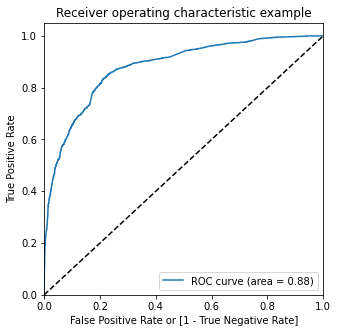

In [130]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [131]:
# (0.88) is the area under the ROC curve , this infers that our model is good.

In [132]:
# Finding optimal cut-off point (Other than 0.5 which we have chosen)

# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.205447,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.128921,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.214782,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.848559,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.761548,7987,1,1,1,1,1,1,1,1,1,0,0


In [133]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.592033  0.968111  0.356466
0.2   0.2  0.750905  0.899019  0.658131
0.3   0.3  0.798614  0.859771  0.760307
0.4   0.4  0.808219  0.787408  0.821255
0.5   0.5  0.807117  0.670482  0.892702
0.6   0.6  0.798457  0.597711  0.924200
0.7   0.7  0.784916  0.522486  0.949296
0.8   0.8  0.759565  0.418234  0.973367
0.9   0.9  0.719729  0.290679  0.988476


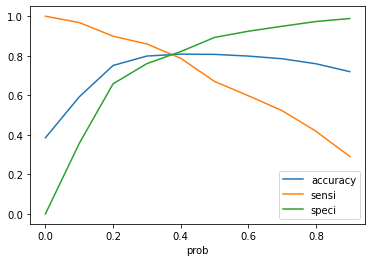

In [134]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [135]:
# From the curve above, 0.38 is found to be the optimum point to take as a cutoff probability.

In [136]:
# Using 0.38 as cutoff:

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( 
    lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.205447,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.128921,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.214782,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.848559,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.761548,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [137]:
# Assigning lead Score to train data

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( 
    lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.205447,3009,0,1,1,1,0,0,0,0,0,0,0,0,21
1,0,0.128921,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.214782,9226,0,1,1,1,0,0,0,0,0,0,0,0,21
3,1,0.848559,4750,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.761548,7987,1,1,1,1,1,1,1,1,1,0,0,1,76


In [138]:
# Evaluating the model

# Overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8074319004881121


In [139]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3160,  745],
       [ 478, 1968]])

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8045789043336059


In [142]:
# Calculating specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8092189500640204


In [143]:
# Calculating false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19078104993597952


In [144]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7253962403243642


In [145]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.868609125893348


In [146]:
# Presicion and Recall
# Precision = Positive Predictive Value, it refers to the percentage of the results which are relevant.
# Recall = Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, 
                                     y_train_pred_final.predicted )
confusion


array([[3486,  419],
       [ 806, 1640]])

In [147]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7965031568722681


In [148]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6704824202780049


In [149]:
# Using SKlearn for Precision and Recall

print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7965031568722681


In [150]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6704824202780049


In [151]:
# Tradeoff - Precision and Recall

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, 
                                          y_train_pred_final.Converted_prob)

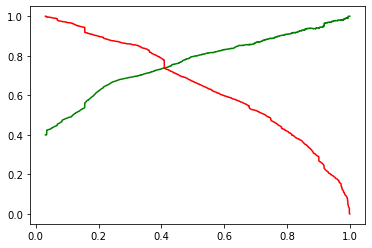

In [153]:
# Plotting trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [154]:
# Making Predictions on the test set

# Scaling test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [155]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0


In [156]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.196469
1490    0.961727
7936    0.174102
4216    0.782222
3830    0.145674
1800    0.658409
6507    0.374708
4821    0.300835
4223    0.917256
4714    0.214782
dtype: float64

In [157]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
y_pred_1.head()

,0
3271,0.196469
1490,0.961727
7936,0.174102
4216,0.782222
3830,0.145674


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [161]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.196469
1,1,1490,0.961727
2,0,7936,0.174102
3,1,4216,0.782222
4,0,3830,0.145674


In [164]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [165]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [166]:
# y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.196469
1,1490,1,0.961727
2,7936,0,0.174102
3,4216,1,0.782222
4,3830,0,0.145674


In [167]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [168]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.196469,0
1,1490,1,0.961727,1
2,7936,0,0.174102,0
3,4216,1,0.782222,1
4,3830,0,0.145674,0


In [169]:
# Overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7980168931325744


In [170]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1367,  367],
       [ 183,  806]])

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8149646107178968


In [173]:
# Calculating specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7883506343713956


In [174]:
# Assigning Lead Score to the Testing data

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.196469,0,20
1,1490,1,0.961727,1,96
2,7936,0,0.174102,0,17
3,4216,1,0.782222,1,78
4,3830,0,0.145674,0,15


In [175]:
# Results

# Comparing the values obtained for Train & Test:

# Train Data:
# Accuracy : 80.7 %
# Sensitivity : 80.4 %
# Specificity : 80.9 %

# Test Data:
# Accuracy : 79.8 %
# Sensitivity : 81.4 %
# Specificity : 78.8 %

# Thus target lead conversion rate using this model is around 80%. 
# This Model seems to predict the Conversion Rate as desired 
# and decision shall be made in making good calls 
# to get a higher lead conversion rate of approx 80% from roughly 38% in the raw data.


In [176]:
# Leads that may be contacted based on this model

# The customers which are to be contacted are those having "Lead Score" 
# equal to or greater than 80. They are 'Hot Leads'.

hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.961727,1,96
8,4223,1,0.917256,1,92
16,1946,1,0.853543,1,85
21,2461,1,0.992918,1,99
23,5822,1,0.997778,1,100
...,...,...,...,...,...
2694,1566,1,0.939229,1,94
2699,6461,1,0.966436,1,97
2703,5741,1,0.891460,1,89
2715,6299,1,0.895992,1,90


In [177]:
# The Prospect ID of these 424 customers to be contacted are :

print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 4809, 4959, 2010, 4062, 7696,
       9049, 1518, 4543, 4830, 4365, 3542, 7347, 2504, 7674, 8596, 4003,
       4963, 6947, 4807,  446,  789, 8372, 5805, 4478, 3758,  337, 1561,
       5367,  737, 9034, 6423, 8286, 7174, 4461, 1436, 7552, 3932, 4080,
       1475, 5785, 1867, 2860, 7253, 4297,  200, 5490, 1995, 6532, 4498,
       5797, 8687, 7653,   76, 2018, 6743, 3703, 3307, 3976, 5769, 1051,
       5742, 1663, 3288, 6557, 8959, 7521, 8282, 8213, 9063, 5292, 6913,
       1481,  785, 3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 3055,
       7417, 4179, 4994, 8568, 7268, 4353, 6784, 6754, 7236, 5725, 2960,
       1667, 7753, 3983, 4487,  802, 8745, 4455, 4717,  505, 6094, 4992,
       7036, 2680, 7065,  112, 6149, 7157, 3827, 7175, 1675, 6999, 5932,
       5826, 8492, 6499, 2481, 3439, 4612, 7468, 7129, 4793, 1557, 4837,
       2495,  822, 8111, 2378, 5090, 5075,  855, 7699, 5638, 2342, 8077,
       2727,  720, 7489,  941, 2961, 1542, 5656, 26

In [178]:
# Resultant model's Final Features (Most significant to least)

res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.775277
What is your current occupation_Working Professional    2.582401
Lead Source_Welingak Website                            2.537434
Last Activity_Other_Activity                            2.180109
Last Notable Activity_Unreachable                       1.453529
Last Activity_Unsubscribed                              1.358496
Last Activity_SMS Sent                                  1.319413
Total Time Spent on Website                             0.973922
const                                                   0.295554
Last Activity_Olark Chat Conversation                  -0.707597
Last Notable Activity_Modified                         -0.926691
Specialization_Others                                  -1.119136
Lead Origin_Landing Page Submission                    -1.492071
Do Not Email                                           -1.651315
dtype: float64

In [179]:
# Inference and Recommendation

# Equation of final model(Which is model 9 in our case here) can be given as below:
# Converted = -0.0376 + 5.8115 * Lead Source_Welingak Website + 3.3166 * Lead Source_Reference + 2.6083 *What is your current occupation_Working Professional + 2.1751 * Last Activity_Other_Activity + 1.2942 * Last Activity_SMS Sent + 1.0954 * Total Time Spent on Website + 1.0819 * Lead Source_Olark Chat - 0.9004 * Last Notable Activity_Modified - 0.9613 * Last Activity_Olark Chat Conversation - 1.194 * Lead Origin_Landing Page Submission - 1.2025 * Specialization_Others -1.5218 * Do Not Email

# Which means, the significance of each of those features in descending order are as below.
# Lead Origin_Lead Add Form                               2.775277 (Most positive effect on Conversion - i.e. they should be contacted)
# What is your current occupation_Working Professional    2.582401
# Lead Source_Welingak Website                            2.537434
# Last Activity_Other_Activity                            2.180109
# Last Notable Activity_Unreachable                       1.453529
# Last Activity_Unsubscribed                              1.358496
# Last Activity_SMS Sent                                  1.319413
# Total Time Spent on Website                             0.973922
# constnce                                                   0.295554
# Last Activity_Olark Chat Conversation                  -0.707597 (Negative effect (This feature to below)- Need not be contacted)
# Last Notable Activity_Modified                         -0.926691
# Specialization_Others                                  -1.119136
# Lead Origin_Landing Page Submission                    -1.492071
# Do Not Email                                           -1.651315 (Most Negative effect on conversion - i.e. they need not be contacted)

# 

This indicates that our hot leads are users that origin from adding form, and higher conversion chance if working professional.
Also we should avoid contacting users that do not want email notification, least conversion cha

In [ ]:
## End of Model ##